<a href="https://colab.research.google.com/github/SHAIKHHUZEFA/basic-django-project/blob/master/analysis%20on%20mall%20dataset%20using%20KMEAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
data = pd.read_csv('Mall_Customers.csv')

In [0]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


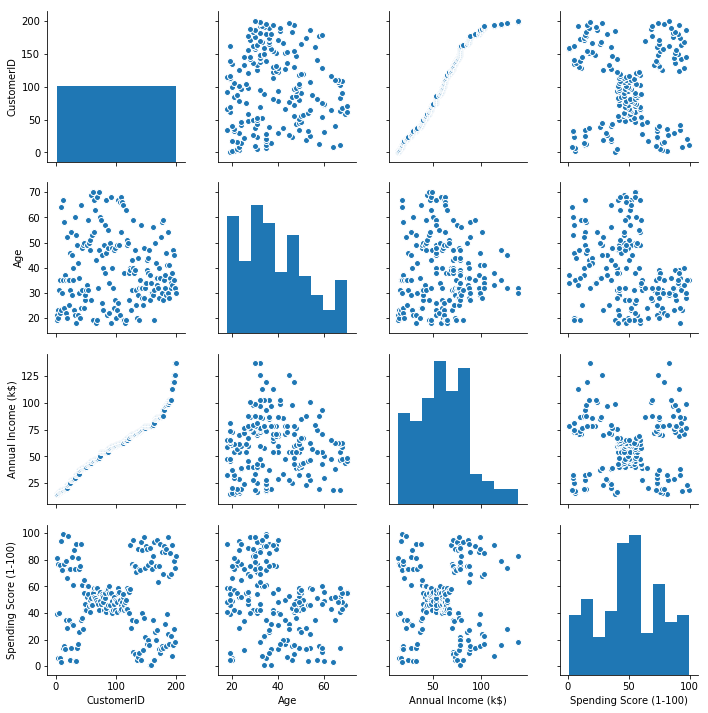

In [0]:
#EDA -- Visual EDA
import seaborn as sns
sns.pairplot(data)

In [0]:
#Two Hypothesis That I create
# Annual Income v/s Spending Score --- k = 5
# Age v/s Spending Score ------------- k = 2

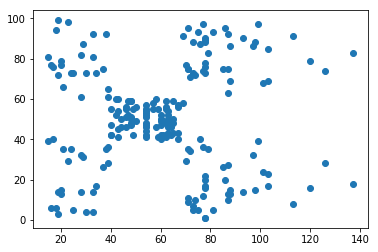

In [0]:
plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'])

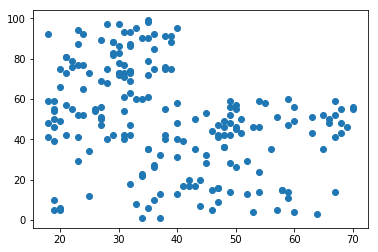

In [0]:
plt.scatter(data['Age'],data['Spending Score (1-100)'])

In [0]:
# Use Kmeans to create cluster
# Annual Income v/s Spending Score --- k = 5

from sklearn.cluster import KMeans
modelIncomeVsScore = KMeans(n_clusters=5)

In [0]:
features = data.iloc[:,[3,4]].values

In [0]:
modelIncomeVsScore.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [0]:
group = modelIncomeVsScore.predict(features)

In [0]:
group

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [0]:
dataResult = data
dataResult['group']=group
dataResult.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),group
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


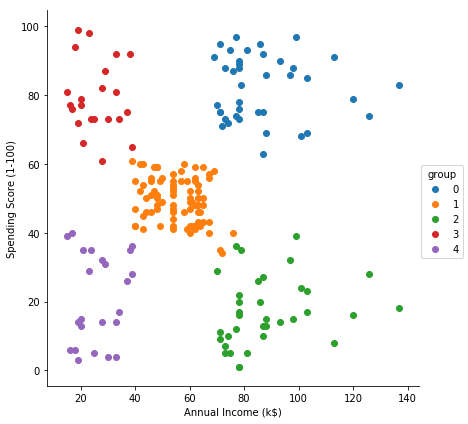

In [0]:
sns.FacetGrid(dataResult,hue='group', size = 6) \
   .map(plt.scatter,'Annual Income (k$)','Spending Score (1-100)') \
   .add_legend()

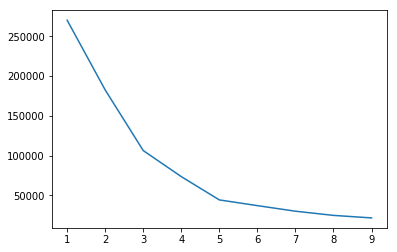

In [0]:
#Lets figure out whether the value of K selected is the ideal value for the dataset or not
#We will be using Elbow Method

wcss=[]
for i in range(1,10):
    model = KMeans(n_clusters=i)
    model.fit(features)
    wcss.append(model.inertia_)
    
plt.plot(range(1,10),wcss)

In [0]:
?KMeans